# **MÓDULO 18 - Regressão Linear**
## Regressão Linear


**Objetivo Geral**:Desenvolver um modelo de regressão linear múltipla a fim de  prever o preço de imóveis dadas as variáveis independentes do nosso modelo. Para isso, a atividade seguirá por 5 passos, conforme descrito abaixo.
1. Pré-processamento dos dados - parte 1
2. Pré-processamento dos dados - parte 2
3. Pré-processamento dos dados - parte 3
4. Modelo de regressão Linear simples
5. Modelo de regressão linear multipla

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
import warnings
#alertas
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')
df = df.rename(columns={"N_banheiros": "N_Banheiros"})
df.head(12)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

### **1 - Pré processamento dos dados- Parte 1**
>a) Verifique os tipos de dados\
>b) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

#### a) Tipos de dados
Nossos dados são compostos por 7 colunas e 7203, não apresentados valores nulos. Contamos **598 linhas duplicadas**.É perfeitamente razoavel encontrar imoveis com mesmas caracteristicas e valores, porém para o propósito de estimar a aluguel a partir de um conjunto de variaveis, tais informações seriam ponderações as estimativas. Desta forma decidimos excluí-las par ter apenas valores unicos em nossa base.

A  **Tabela 1** apresenta detalhes dos tipos de dados.
| # | Column            | Non-Null Count | Dtype |
|---|------------------|---------------|-------|
| 0 | Valor_Aluguel     | 6605 non-null | int64 |
| 1 | Valor_Condominio  | 6605 non-null | int64 |
| 2 | Metragem          | 6605 non-null | int64 |
| 3 | N_Quartos         | 6605 non-null | int64 |
| 4 | N_Banheiros       | 6605 non-null | int64 |
| 5 | N_Suites          | 6605 non-null | int64 |
| 6 | N_Vagas           | 6605 non-null | int64 |
**Tabela 1:** df.info()
#### b) Verificação de Dados Nulos
O conjunto analisado não apresenta dados nulos. A verificação foi realizada utilizando a função **isnull()** que identificou a ausência de valores representados por None ou NaN. Portanto, o dataset pode ser considerado completo e pronto para análises subsequentes.



In [3]:
df.info()
df.drop_duplicates(inplace=True) 
df.info()
df.describe()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_Banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 6605 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     6605 non-null   int64
 1   Valor_Condominio  6605 non-null   int64
 2   Metragem          6605 non-null   int64
 3   N_Quartos         6605 non-null   int64
 4   N_Banheiros       6605 non-null   int64
 5   N_Suites          6605 non-n

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7198,False,False,False,False,False,False,False
7199,False,False,False,False,False,False,False
7200,False,False,False,False,False,False,False
7201,False,False,False,False,False,False,False


### 2 - Pré processamento dos dados- Parte 2
>a) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados\
>b) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado\
>c) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado\

#### a) Outliers e Distribuição dos dados.

a **Tabela 2** apresenta a saída da função describe. Observamos que todas as colunas, a priori, não apresentam um distribuição normal. Média e mediana não não são iguais, o que nós aponta para que os dados não seguem uma distribuição normal.

| Estatística | Valor_Aluguel | Valor_Condominio | Metragem | N_Quartos | N_banheiros | N_Suites | N_Vagas |
|------------|--------------|-----------------|---------|-----------|------------|---------|---------|
| count      | 6605.000000  | 6605.000000     | 6605.000000 | 6605.000000 | 6605.000000 | 6605.000000 | 6605.000000 |
| mean       | 3024.524905  | 829.178804      | 89.655413  | 2.305072  | 2.104164   | 1.020288  | 1.452990  |
| std        | 3022.964453  | 811.521280      | 62.963890  | 0.833349  | 1.000631   | 0.888489  | 0.886046  |
| min        | 480.000000   | 0.000000        | 30.000000  | 1.000000  | 1.000000   | 0.000000  | 0.000000  |
| 25%        | 1400.000000  | 400.000000      | 52.000000  | 2.000000  | 2.000000   | 1.000000  | 1.000000  |
| 50% (mediana) | 2000.000000  | 600.000000      | 68.000000  | 2.000000  | 2.000000   | 1.000000  | 1.000000  |
| 75%        | 3400.000000  | 1000.000000     | 101.000000 | 3.000000  | 2.000000   | 1.000000  | 2.000000  |
| max        | 25000.000000 | 9500.000000     | 880.000000 | 10.000000 | 8.000000   | 5.000000  | 9.000000  |
**Tabela 2:** df.describe()

#### b) Tratamento de Outliers
Foram identificadas três variáveis que apresentam outliers:**Valor_Aluguel**, **Valor_Condomínio** e **Metragem**. Para filtrar, utilizei a abordagem do **Intervalo Interquartil (IQR)**, que define limites superiores e inferiores para a exclusão dos outliers. Inicialmente, apliquei esse processo em cada coluna individualmente e avaliei os resultados por meio de boxplots. No entanto, percebi que, embora alguns outliers fossem removidos, novos outliers surgiam no DataFrame filtrado. Isso ocorre porque a remoção dos valores extremos altera a distribuição dos dados, revelando novos pontos que agora se enquadram como outliers. 

Para resolver esse problema, implementei um código iterativo (apresentado abaixo) que repete o processo de cálculo dos limites IQR e filtragem dos dados até que o número de outliers seja igual a zero. Essa abordagem garantiu a eliminação consistente de todos os outliers. No entanto, o **conjunto de dados foi reduzido em 33%, passando de aproximadamente 6600 para 4400 registros**.*As Figuras x e Figuras apresentam os boxplot antes de depois deste processo. 

Após a remoção dos outliers nas colunas citadas, as demais (**N_Quartos**, **N_banheiros**, **N_Suites** e **N_Vagas**) apresentam uma variabilidade reduzida e valores máximos que estão dentro de intervalos razoáveis. Portanto, não há outliers significativos nessas colunas no DataFrame filtrado.( **Tabela 3**). 
| Estatística       | Valor_Aluguel | Valor_Condominio | Metragem | N_Quartos | N_Banheiros | N_Suites | N_Vagas |
|------------------|--------------|-----------------|----------|-----------|------------|----------|---------|
| count           | 4424         | 4424            | 4424     | 4424      | 4424       | 4424     | 4424    |
| mean            | 1728.16      | 465.88          | 59.60    | 2.02      | 1.70       | 0.68     | 1.08    |
| std             | 685.95       | 243.25          | 14.71    | 0.65      | 0.50       | 0.48     | 0.44    |
| min             | 480.00       | 0.00            | 30.00    | 1.00      | 1.00       | 0.00     | 0.00    |
| 25%             | 1200.00      | 330.00          | 49.00    | 2.00      | 1.00       | 0.00     | 1.00    |
| 50% (mediana)   | 1550.00      | 482.00          | 58.00    | 2.00      | 2.00       | 1.00     | 1.00    |
| 75%             | 2100.00      | 636.00          | 70.00    | 2.00      | 2.00       | 1.00     | 1.00    |
| max             | 3998.00      | 995.00          | 99.00    | 4.00      | 4.00       | 3.00     | 3.00    |
**Tabela 3**

**Comentário adcional::**
Considerei,como alternativa,a possibilidade de agrupar os dados por **Metragem** e definir categorias como baixo, médio e alto padrão. Essa abordagem permitiria analisar os outliers dentro de cada categoria, possivelmente reduzindo a perda de dados e tornando a análise mais específica. No entanto, essa solução aumentaria a complexidade do processo, pois seria necessário.
#### c) Análise bivariada dos dados
A **Figura 3** apresenta os resultada do agrupamento dos dados entre Metragem e Valor médio do Aluguel, Condomínio e N_Vagas. Agrupamos os intervalos de metragem com intervalos em 5 m² para não poluir a visualização. De forma geral  foi revelado uma uma tendência de aumento de todas as variaveis com a metragem.
Um dado importante é a variabilidade, representado aqui pela desvio padrão, que foi alto na precificação do imovel, isso pode indicar tanto que a metragem não é a unica responsavel pelo valor, quanto outras variaveis não classificadas ou identificada.Já o número de vagas é mais consistente dentro de cada faixa de metragem, com um desvio padrão relativamente baixo.

In [4]:
# def filt_outlier(df, cat_name):
#     N_outliers=10
#     N=len(df)
#     i=0
#     while (N_outliers) > 0:
#         N=len(df)
#         i += 1  # Incrementa o contador de iterações
#         print('Iteração:', i)

#         # IQR
#         li = 0.25
#         Q1 = df[cat_name].quantile(li)
#         Q3 = df[cat_name].quantile(1 - li)

#         IQR = Q3 - Q1
#         C = 1.5

#         #limites inferior e superior
#         limite_inferior = Q1 - C * IQR
#         limite_superior = Q3 + C * IQR

#         # Filtrar o DataFrame para remover outliers
#         df = df[(df[cat_name] >= limite_inferior) & (df[cat_name] <= limite_superior)]
#         N_outliers=N-len(df)
#         print('N_outliers:',N_outliers)
#     # Retornar o DataFrame sem outliers
#     return df

In [5]:
def limitesIRQ(col):
    
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    K=1.5
    lim_i = Q1 - K * IQR
    lim_s = Q3 + K * IQR
    return lim_i, lim_s

def filt_outlier2(df,col_names):
    N_outliers=100
    c=0
    while (N_outliers) > 0:
        c+=1
        N=len(df) #dimensao inicial
        lim = {
        col_names[0]: limitesIRQ(df[col_names[0]]),
        col_names[1]: limitesIRQ(df[col_names[1]]),
        col_names[2]: limitesIRQ(df[col_names[2]])}

        df = df[
            (df[col_names[0]] >= lim[col_names[0]][0]) & (df[col_names[0]] <= lim[col_names[0]][1])&
            (df[col_names[1]] >= lim[col_names[1]][0]) & (df[col_names[1]] <= lim[col_names[1]][1])&
            (df[col_names[2]] >= lim[col_names[2]][0]) & (df[col_names[2]] <= lim[col_names[2]][1])
        ].reset_index(drop=True)
        
        N_outliers=N-len(df)
        print('iteração:',c,'N_outliers:',N_outliers)
    return df

def filt_outlier3(df,col_names,N):
#    N- Numero de iteraçoes
    c=0
    for i in range(N):
        c+=1
        N=len(df) #dimensao inicial
        lim = {
        col_names[0]: limitesIRQ(df[col_names[0]]),
        col_names[1]: limitesIRQ(df[col_names[1]]),
        col_names[2]: limitesIRQ(df[col_names[2]])}

        df = df[
            (df[col_names[0]] >= lim[col_names[0]][0]) & (df[col_names[0]] <= lim[col_names[0]][1])&
            (df[col_names[1]] >= lim[col_names[1]][0]) & (df[col_names[1]] <= lim[col_names[1]][1])&
            (df[col_names[2]] >= lim[col_names[2]][0]) & (df[col_names[2]] <= lim[col_names[2]][1])
        ].reset_index(drop=True)
        
        N_outliers=N-len(df)
        print('iteração:',c,'N_outliers:',N_outliers)
    return df
    

In [6]:
colunas = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem']
print('Dimensão inicial:',len(df))
df2=filt_outlier2(df, colunas)
print('Dimensão final:',len(df2))
print(f'Redução: {(len(df2) / len(df) - 1) * 100:.2f}%')
df2.describe()

Dimensão inicial: 6605
iteração: 1 N_outliers: 915
iteração: 2 N_outliers: 668
iteração: 3 N_outliers: 331
iteração: 4 N_outliers: 143
iteração: 5 N_outliers: 120
iteração: 6 N_outliers: 39
iteração: 7 N_outliers: 1
iteração: 8 N_outliers: 2
iteração: 9 N_outliers: 0
Dimensão final: 4386
Redução: -33.60%


,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_Banheiros,N_Suites,N_Vagas
count,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000
mean,1673.358869,474.507068,60.082079,2.035112,1.696078,0.674647,1.079799
std,601.779198,253.802191,15.182722,0.646822,0.502190,0.486235,0.443905
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000
25%,1200.000000,330.750000,50.000000,2.000000,1.000000,0.000000,1.000000
50%,1500.000000,484.000000,59.000000,2.000000,2.000000,1.000000,1.000000
75%,2000.000000,640.750000,70.000000,2.000000,2.000000,1.000000,1.000000
max,3200.000000,1100.000000,100.000000,4.000000,4.000000,3.000000,3.000000


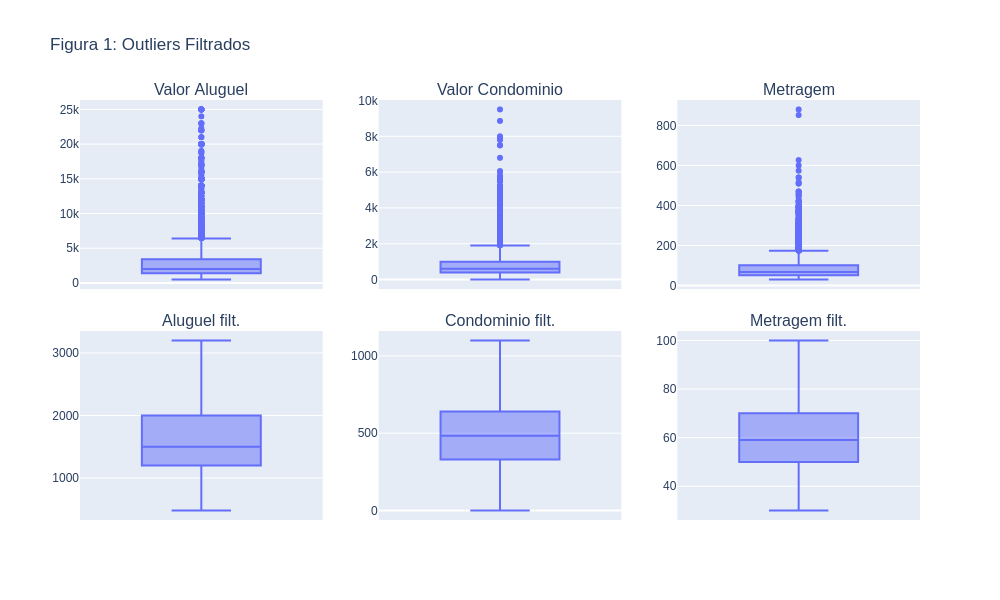

In [7]:
# Figura1 : BoxPlot dados sem outliers
fig = sp.make_subplots(rows=2, cols=3, 
                       subplot_titles=('Valor Aluguel', 'Valor Condominio', 'Metragem',
                                      'Aluguel filt.','Condominio filt.','Metragem filt.'),
                       vertical_spacing=0.1)

# Adicionar boxplot para 'Valor_Aluguel'
fig.add_trace(px.box(df, y='Valor_Aluguel').data[0], row=1, col=1)

fig.add_trace(px.box(df, y='Valor_Condominio').data[0], row=1, col=2)

fig.add_trace(px.box(df, y='Metragem').data[0], row=1, col=3)


fig.add_trace(px.box(df2, y='Valor_Aluguel').data[0], row=2, col=1)

fig.add_trace(px.box(df2, y='Valor_Condominio').data[0], row=2, col=2)

fig.add_trace(px.box(df2, y='Metragem').data[0], row=2, col=3)


fig.update_layout(
    title_text="Figura 1: Outliers Filtrados",  # Título geral
    showlegend=False,  # Ocultar legenda
    height=600,  # Altura da figura
    width=1000   # Largura da figura
)


fig.show('png')

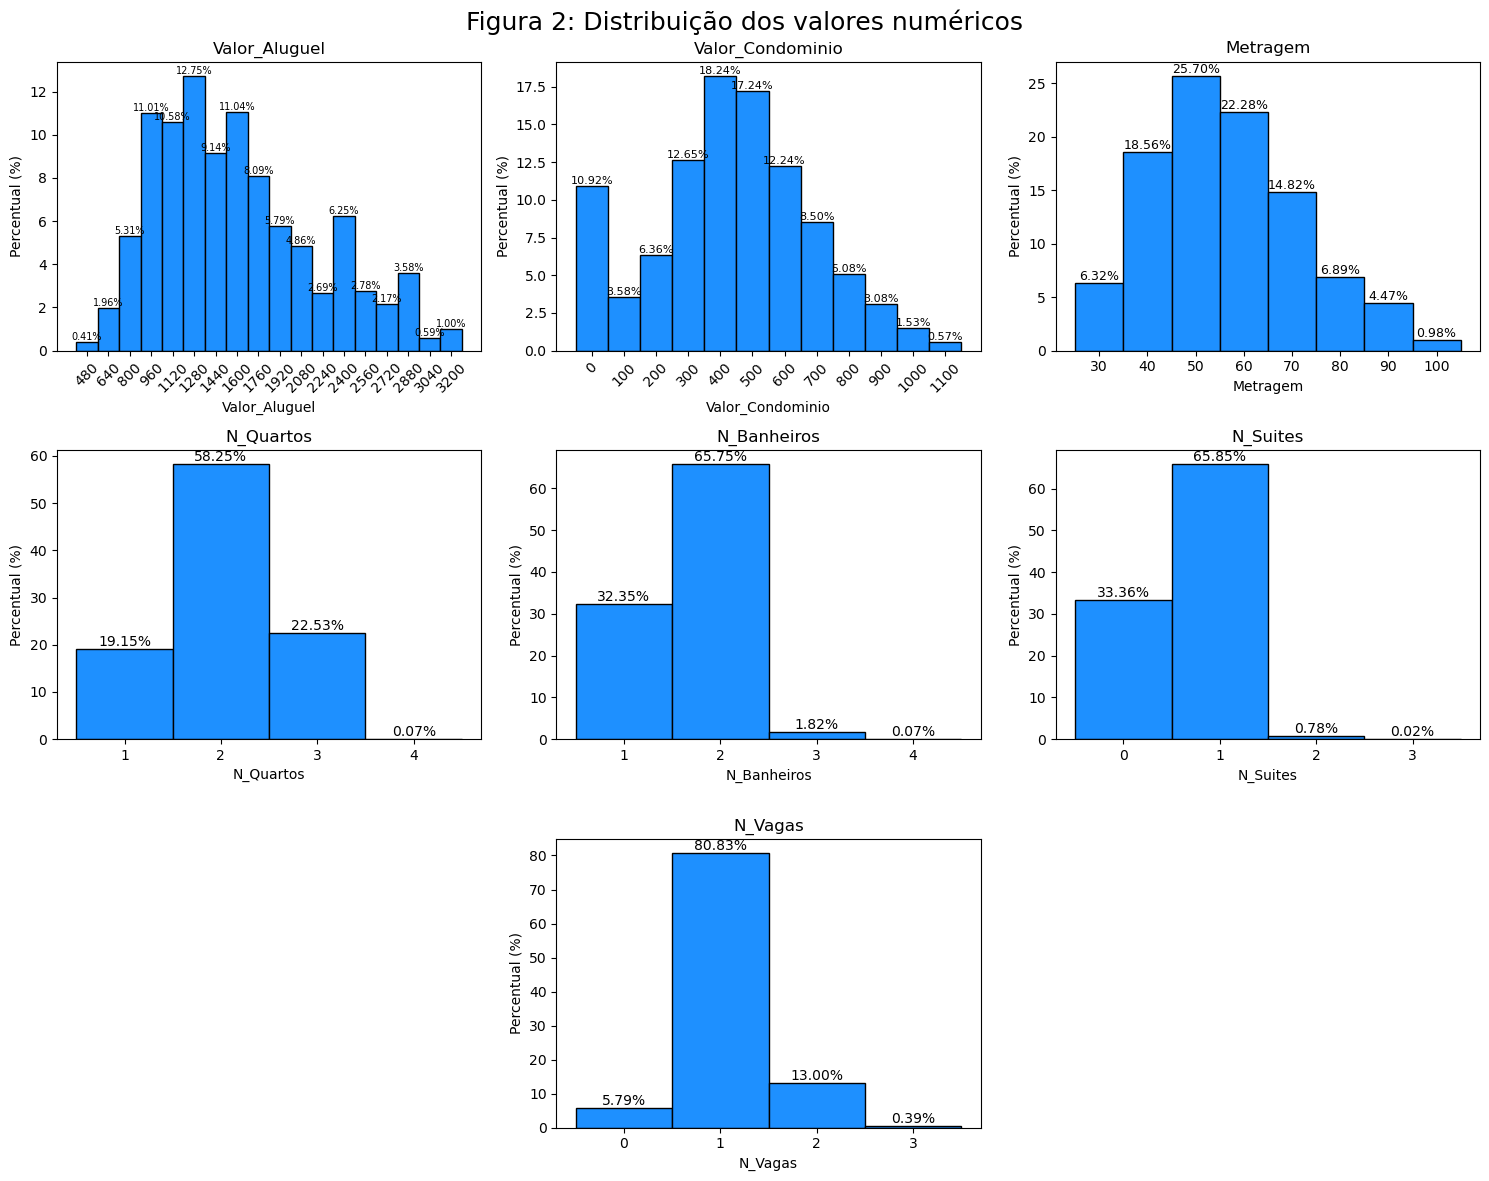

In [8]:
# Histogramas do  conjunto de dados ( após filtragem)
fig, ax = plt.subplots(3, 3, figsize=(15, 12)) 
fig.suptitle('Figura 2: Distribuição dos valores numéricos', fontsize=18)

N=len(df2)

def hist_p(df,name_cat,dx):
    temp=df[name_cat]
    bins=np.arange(min(temp),max(temp)+dx+1,dx)
    c, x= np.histogram(temp, bins) 
    p=c/N*100
    return c,x,p,bins

def mult_bar(p1,p2,c,x,p,bins,name_cat):
    dx=bins[1]-bins[0]
    ax[p1,p2].bar(x[0:-1], p, width=np.diff(bins), align='center',color='dodgerblue', edgecolor='black')  
    ax[p1,p2].set_title(name_cat)
    ax[p1,p2].set_xlabel(name_cat)
    ax[p1,p2].set_ylabel('Percentual (%)')
    ax[p1,p2].set_xticks(bins[0:-1])
    if len(bins) > 10 :
        ax[p1,p2].set_xticklabels(bins[0:-1], rotation=45)
        
    for i in range(len(c)):
        fs = max(6, 10 - len(c) // 5)
        ax[p1,p2].text(x[i], p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=fs)
    
    
c1,x1,p1,bins1=hist_p(df2,'Valor_Aluguel',160)
c2,x2,p2,bins2=hist_p(df2,'Valor_Condominio',100)
c3,x3,p3,bins3=hist_p(df2,'Metragem',10)

c4,x4,p4,bins4=hist_p(df2,'N_Quartos',1)
c5,x5,p5,bins5=hist_p(df2,'N_Banheiros',1)
c6,x6,p6,bins6=hist_p(df2,'N_Suites',1)
c7,x7,p7,bins7=hist_p(df2,'N_Vagas',1)

mult_bar(0,0,c1,x1,p1,bins1,'Valor_Aluguel')
mult_bar(0,1,c2,x2,p2,bins2,'Valor_Condominio')
mult_bar(0,2,c3,x3,p3,bins3,'Metragem')
mult_bar(1,0,c4,x4,p4,bins4,'N_Quartos')
mult_bar(1,1,c5,x5,p5,bins5,'N_Banheiros')
mult_bar(1,2,c6,x6,p6,bins6,'N_Suites')
mult_bar(2,1,c7,x7,p7,bins7,'N_Vagas')

ax[2][0].set_visible(False)
ax[2][2].set_visible(False)
plt.tight_layout()
plt.show()

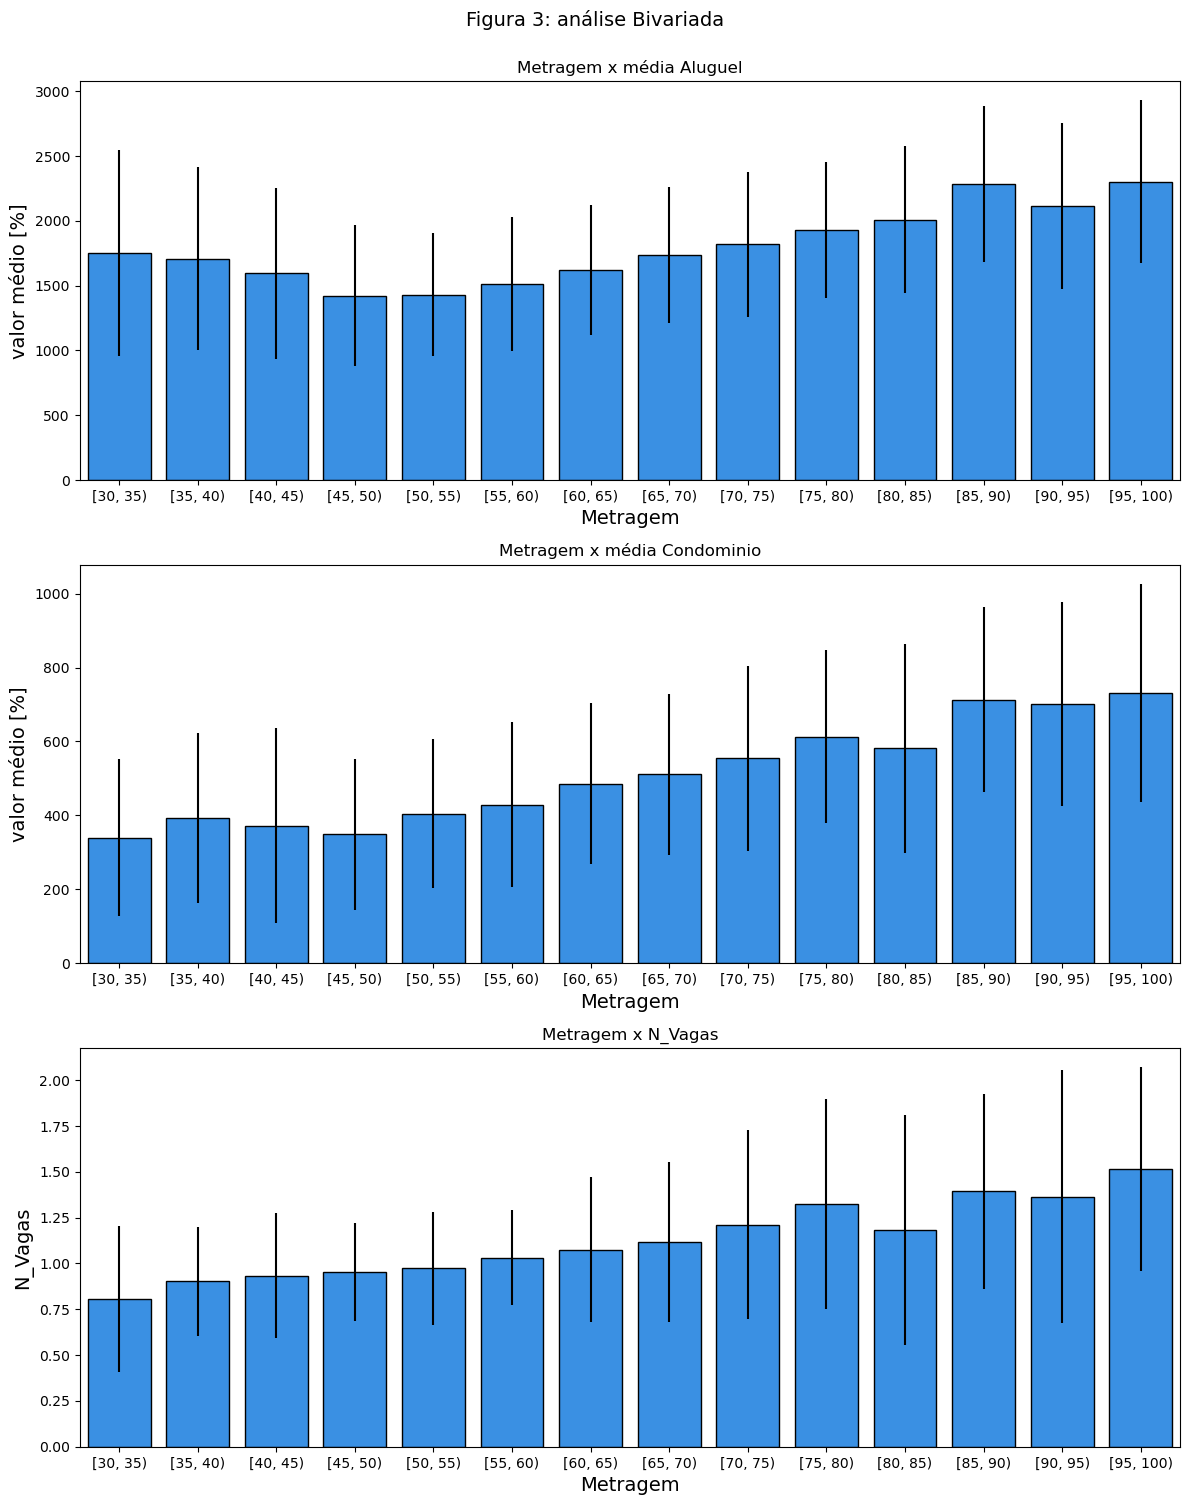

In [9]:
#Análise Bivariada
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Figura 3: análise Bivariada', fontsize=14,y=1);
sns.set_style("whitegrid") 

bins3=np.arange(30,105,5)
df2['Metragem_inter'] = pd.cut(df2['Metragem'], bins=bins3, right=False)
# plot 1: Metragem x média Aluguel

df_grp1 = df2.groupby('Metragem_inter')['Valor_Aluguel'].agg(['mean', 'std']).reset_index()
df_grp1.columns = ['Metragem_inter', 'Mean', 'Std']  # Renomear colunas

sns.barplot(x='Metragem_inter', y='Mean', data=df_grp1, yerr=df_grp1['Std'],
              color='dodgerblue',edgecolor='black',ax=ax[0])
ax[0].set_title('Metragem x média Aluguel')
ax[0].set_xlabel('Metragem', fontsize=14)
ax[0].set_ylabel('valor médio [%]', fontsize=14)

# plot 2: Metragem x condominio
df_grp2 = df2.groupby('Metragem_inter')['Valor_Condominio'].agg(['mean', 'std']).reset_index()
df_grp2.columns = ['Metragem_inter', 'Mean', 'Std']  # Renomear colunas

sns.barplot(x='Metragem_inter', y='Mean', data=df_grp2, yerr=df_grp2['Std'],
              color='dodgerblue',edgecolor='black',ax=ax[1])
ax[1].set_title('Metragem x média Condominio')
ax[1].set_xlabel('Metragem', fontsize=14)
ax[1].set_ylabel('valor médio [%]', fontsize=14)


# plot 3: Metragem x Numero de Vagas
df2['Metragem_inter'] = pd.cut(df2['Metragem'], bins=bins3, right=False)

df_grp3 = df2.groupby('Metragem_inter')['N_Vagas'].agg(['mean', 'std']).reset_index()
df_grp3.columns = ['Metragem_inter', 'Mean', 'Std']  # Renomear colunas



sns.barplot(x='Metragem_inter', y='Mean', data=df_grp3, yerr=df_grp3['Std'],
             color='dodgerblue',edgecolor='black',ax=ax[2])
ax[2].set_title('Metragem x N_Vagas')
ax[2].set_xlabel('Metragem', fontsize=14)
ax[2].set_ylabel('N_Vagas', fontsize=14)

plt.tight_layout() 

In [10]:
aa=pd.concat([df_grp1,df_grp2,df_grp3],axis=1)
aa.columns = ['Metragem','Mean_aluguel','Std_aluguel','Metragem','Mean_Condominio','Std_Condominio','Metragem','Mean_Nvagas','Std_NVagas']
aa


,Metragem,Mean_aluguel,Std_aluguel,Metragem,Mean_Condominio,Std_Condominio,Metragem,Mean_Nvagas,Std_NVagas
0,"[30, 35)",1754.747573,796.046785,"[30, 35)",339.533981,212.499726,"[30, 35)",0.805825,0.397498
1,"[35, 40)",1707.810345,706.807611,"[35, 40)",393.816092,230.368292,"[35, 40)",0.902299,0.297767
2,"[40, 45)",1596.923841,659.158769,"[40, 45)",372.533113,262.790312,"[40, 45)",0.933775,0.339413
3,"[45, 50)",1422.300781,543.946019,"[45, 50)",348.931641,204.750875,"[45, 50)",0.953125,0.268631
4,"[50, 55)",1431.795031,472.509282,"[50, 55)",404.107143,201.292471,"[50, 55)",0.973602,0.306871
5,"[55, 60)",1511.101449,517.872455,"[55, 60)",428.879917,222.551440,"[55, 60)",1.031056,0.259804
6,"[60, 65)",1621.319343,501.871673,"[60, 65)",485.908759,217.956235,"[60, 65)",1.074818,0.396356
7,"[65, 70)",1736.242424,526.715135,"[65, 70)",511.023310,218.118472,"[65, 70)",1.116550,0.438169
8,"[70, 75)",1820.117936,559.733074,"[70, 75)",554.120393,250.099010,"[70, 75)",1.211302,0.515351
9,"[75, 80)",1928.395062,526.694032,"[75, 80)",613.390947,234.158365,"[75, 80)",1.325103,0.572499


### 3 - Pré processamento dos dados- Parte 2
>A) plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.
> B) Separe treino e teste.

#### a) Correlação
A **Tabela 4** apresenta o resultado da matriz de correlação dos dados. 
|                    | Valor_Aluguel | Valor_Condominio | Metragem | N_Quartos | N_Banheiros | N_Suites | N_Vagas |
|--------------------|--------------|-----------------|----------|-----------|------------|----------|---------|
| **Valor_Aluguel**  | 1.00         | 0.39            | 0.32     | 0.08      | 0.15       | 0.13     | 0.29    |
| **Valor_Condominio** | 0.39         | 1.00            | 0.40     | 0.21      | 0.09       | 0.04     | 0.34    |
| **Metragem**       | 0.32         | 0.40            | 1.00     | 0.64      | 0.22       | 0.17     | 0.34    |
| **N_Quartos**      | 0.08         | 0.21            | 0.64     | 1.00      | 0.24       | 0.21     | 0.32    |
| **N_Banheiros**    | 0.15         | 0.09            | 0.22     | 0.24      | 1.00       | 0.94     | 0.33    |
| **N_Suites**       | 0.13         | 0.04            | 0.17     | 0.21      | 0.94       | 1.00     | 0.32    |
| **N_Vagas**        | 0.29         | 0.34            | 0.34     | 0.32      | 0.33       | 0.32     | 1.00    |

**Tabela 4:** Matriz de correlação

A análise das correlações mostrou que as variaveis **Valor_Condominio (0.39)**, **Metragem(0.39)** e **N_Vagas(0.29)** foram que melhor se correlacionaram com o **Valor_Aluguel**, e assim estais se mostram melhores mais relevantes no contexto da modelagem. Além disso,observamos que as variaveis mais fortes bem correlacionadas **N_Quartos** x **Metragem** e **N_Suites** X **N_Banheiros**. Ambos resultados eram esperados.

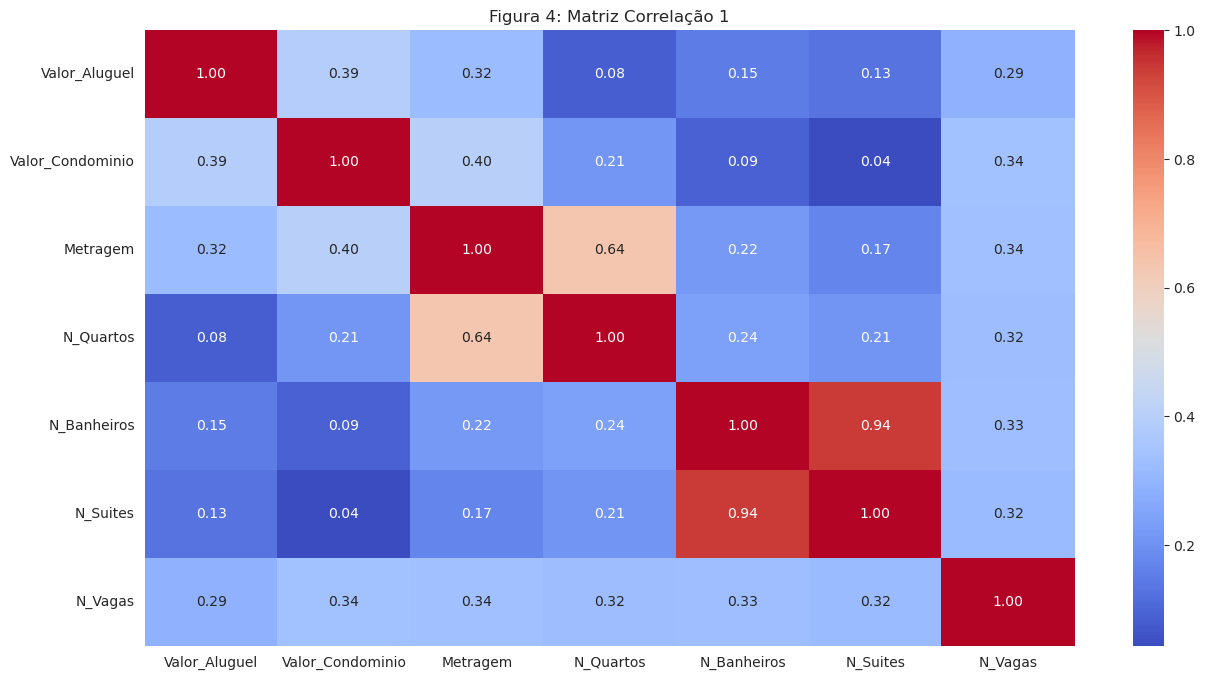

In [11]:
#Matriz de correlação
df_corr = df2.select_dtypes(include=['number']).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr,
           annot=True,
           cmap='coolwarm',
           fmt='.2f',
           annot_kws={'size': 10})
plt.title('Figura 4: Matriz Correlação 1')
plt.show()

#### b)Base de treino e Base de Teste
Definimos como alvo (target) para aprendizado a variável **Valor_Aluguel**, que indica um Para a variável X são as demais variaveis do dataset.Assim, ficaram definidas conforme descrito no código abaixo.

In [12]:
x = df2.drop(['Valor_Aluguel'], axis=1) #todas menos o target
y = df2['Valor_Aluguel'] # previsão Valor Aluguel
print(f"Tamanho de x: {x.shape}")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(f"Base de Treino (feat:train): {x_train.shape}")
print(f"Base de Teste  (feat:test): {x_test.shape}")
print(f"Base de Treino (tag:train ): {y_train.shape}")
print(f"Base de Teste  (tag:teste ): {y_test.shape}")


Tamanho de x: (4386, 7)
Base de Treino (feat:train): (3289, 7)
Base de Teste  (feat:test): (1097, 7)
Base de Treino (tag:train ): (3289,)
Base de Teste  (tag:teste ): (1097,)


### 4 - Modelo de regressão Linear simples
>a) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.\
>b) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.\
>c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não\
>d) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.\
>e) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.\
Para isso altere no código abaixo o nome do seu modelo de regressão:
>f) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.\

#### a) Modelo de Regressão Linear
Nosso modelo de Regressão Linear estima o valor do alugueis usando método mínimos quadrados. Para isso, foi usado os dados da base de treino já definidas no passo anterior.Em linhas de código python temos:
```python
x = x_train[['Metragem']] 
y = y_train
#Modelo de regressão
mod_lin = LR()
mod_lin.fit(x,y)
```

#### b) Equação da Reta

A equação da reta é definida pela expressão $y=ax+b$. Onde Y é o valor estimado para Aluguel, enquanto que x é a metragem. Em nosso problema os coeficientes angular(a) e linear(b) foram encontrado e apresentados nas variaveis de *mod_lin.coef_[0]* e *mod_lin.intercept*. Assim, a equação da reta para o modelo é:\
$$
y=12.9230x+901.347
$$

#### c) Coeficiente de Determinação $R^2$
Um coeficiente de determinação R2 de 0.1078. Em outras palavras, ele é capaz de explicar 10% dos dados. Desta forma, as transformações realizadas, não foram capaz de criar um bom preditor para o valor dos alugueis, apenas usando a metragem como variável independente. **Recomenda-se então, rever o trabalho da filtragem e considerações a cerca dos outliers.** 

In [13]:
# Separar a variável independente da variável dependente
x = x_train[['Metragem']].values.reshape(-1, 1)
y = y_train.values

In [14]:
#Modelo de regressão
mod_lin = LR()
mod_lin.fit(x,y)
print('Equação da reta: Y = aX + b')
print(f'a = {mod_lin.coef_[0]:.3f}')

print(f'b = {mod_lin.intercept_:.3f}')
print(f'Y = {mod_lin.coef_[0]:.3f}X + {mod_lin.intercept_:.3f}')
    
print(f'Coeficiente de Determinação (R²) nos Dados de Treino:{mod_lin.score(x,y):.3f}')
print( '==Métrica para os dados usados==')
media = np.mean(y)
desvio_padrao = np.std(y)
print("Desvio Padrão:", desvio_padrao)
coef_variacao = (desvio_padrao / media) * 100
print("Coeficiente de Variação:", coef_variacao, "%")

Equação da reta: Y = aX + b
a = 12.923
b = 901.347
Y = 12.923X + 901.347
Coeficiente de Determinação (R²) nos Dados de Treino:0.108
==Métrica para os dados usados==
Desvio Padrão: 599.9456741794405
Coeficiente de Variação: 35.65404963932881 %


#### d)Dispersão e Equação de regressão
Os dados usados para realizar e regressão encontravam-se muitos disperso,(CV > 30%) como mostra a **Figura 5**. Desta forma os ajuste da reta de regressão não é significativo para ajustar os dados ou mesmo representar uma real relação de valor de **Alguel X Metragem**. 

#### e) Teste do Modelo
Os resultado do modelo nos dados de teste R² mostraram que a avalição no teste já conhecia a priori. A incapacidade do modelo linear de ajustar a metragem .

#### f) Teste Do Modelo e comparação dos Coeficiente de Determinação (R²)]
Os resultados de **R²** no **Dados de Treino(0.108)** já mostraram que o o modelo não eram capaz de explicar os dados. Os resultados **R² (0.087) para os testes**, foram ainda mais baixo,  confirmaram este ponto, porém já eram esperados. O modelo atual então tem um desempenho insatisfatório, tanto nos dados de treino quanto nos dados de teste. A reavaliação da filtragem de outliers, bem como, garantir que essas informações sejam de fato anomalas. Ao final deste  documento(**Anexo**), apresentam-se uma outra abordagem, no qual o resultado são mais satisfatórios.

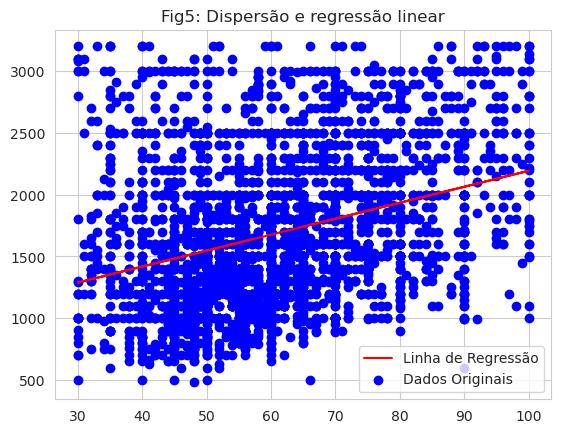

In [15]:
#Grafico de dispersão
plt.scatter(x, y, color='blue', label='Dados Originais')
plt.plot(x, mod_lin.predict(x), color='red', label='Linha de Regressão')
plt.title('Fig5: Dispersão e regressão linear')
plt.legend()
plt.show()

In [16]:
# Variaveis de teste
x_test = x_test[['Metragem']].values.reshape(-1, 1)
y_test = y_test  

In [17]:
# teste do Modelo
previsoes = mod_lin.predict(x_test)
print(f'Coeficiente de Determinação (R²) nos Dados de Teste:{mod_lin.score(x_test, y_test):.3f}')

Coeficiente de Determinação (R²) nos Dados de Teste:0.087


In [18]:
print("== Resumo processos  ==")

# bases de dados
print("\n= Informações sobre as Bases de Dados ==")
print(f"Base de Treino (features): {x_train.shape}")
print(f"Base de Teste  (features): {x_test.shape}")
print(f"Base de Treino (target):   {y_train.shape}")
print(f"Base de Teste  (target):   {y_test.shape}")

# Métricas de dispersão
print("\n== Métricas de Dispersão ==")
print(f"Desvio Padrão:            {desvio_padrao:.3f}")
print(f"Coeficiente de Variação:  {coef_variacao:.3f} %")

# Equação da reta
print("\n== Equação da Reta ==")
print(f"Y = aX + b")
print(f"a (coeficiente angular) = {mod_lin.coef_[0]:.3f}")
print(f"b (intercepto)          = {mod_lin.intercept_:.3f}")
print(f"Equação: Y = {mod_lin.coef_[0]:.3f}X + {mod_lin.intercept_:.3f}")

# Métricas de desempenho
print("\n== Métricas de Desempenho ==")
print(f"Coeficiente de Determinação (R²) nos Dados de Treino: {mod_lin.score(x, y):.3f}")
print(f"Coeficiente de Determinação (R²) nos Dados de Teste:  {mod_lin.score(x_test, y_test):.3f}")

== Resumo processos  ==

= Informações sobre as Bases de Dados ==
Base de Treino (features): (3289, 7)
Base de Teste  (features): (1097, 1)
Base de Treino (target):   (3289,)
Base de Teste  (target):   (1097,)

== Métricas de Dispersão ==
Desvio Padrão:            599.946
Coeficiente de Variação:  35.654 %

== Equação da Reta ==
Y = aX + b
a (coeficiente angular) = 12.923
b (intercepto)          = 901.347
Equação: Y = 12.923X + 901.347

== Métricas de Desempenho ==
Coeficiente de Determinação (R²) nos Dados de Treino: 0.108
Coeficiente de Determinação (R²) nos Dados de Teste:  0.087


### 5 - Modelo de regressão linear multipla
>a) Base treino e teste, dessa vez com todas variáveis para X\
>b) Faça o modelo de regressão linear multipla aplicado só a base de treino\
>c) Traga o valor do R quadrado e avalie o valor encontrado\
>d) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste\
>e) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

#### a)Base treino e teste

In [19]:
#Base de treino e teste
x = df2.drop(['Valor_Aluguel'], axis=1) #todas menos o target
y = df2['Valor_Aluguel'] # previsão Valor Aluguel
print(f"Tamanho de x: {x.shape}")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(f"Base de Treino (feat:train): {x_train.shape}")
print(f"Base de Teste  (feat:test): {x_test.shape}")
print(f"Base de Treino (tag:train ): {y_train.shape}")
print(f"Base de Teste  (tag:teste ): {y_test.shape}")

Tamanho de x: (4386, 7)
Base de Treino (feat:train): (3289, 7)
Base de Teste  (feat:test): (1097, 7)
Base de Treino (tag:train ): (3289,)
Base de Teste  (tag:teste ): (1097,)


#### b)Modelo de regressão linear multipla

In [20]:
#Regressão linear multipla aplicado só a base de treino
x = x_train[['Valor_Condominio','Metragem',	'N_Quartos','N_Banheiros','N_Suites','N_Vagas']]
y = y_train

#Modelo de regressão
mod_lin = LR()
mod_lin.fit(x,y)
print('Equação da reta: Y = aX + b')
print(f'a = {mod_lin.coef_[0]:.3f}')

print(f'b = {mod_lin.intercept_:.3f}')
print(f'Y = {mod_lin.coef_[0]:.3f}X + {mod_lin.intercept_:.3f}')
    


Equação da reta: Y = aX + b
a = 0.656
b = 838.508
Y = 0.656X + 838.508


#### c)Coeficiente de Determinação $R^2$

In [21]:
print(f'Coeficiente de Determinação (R²) nos Dados de Treino:{mod_lin.score(x,y):.3f}')

Coeficiente de Determinação (R²) nos Dados de Treino:0.244


#### d)Teste do Modelo

In [22]:
x_test = x_test[['Valor_Condominio','Metragem',	'N_Quartos','N_Banheiros','N_Suites','N_Vagas']]
y_test = y_test
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = mod_lin.predict(x_test)
# Avaliando o desempenho do modelo usando métricas como o R²
print(f'Coeficiente de Determinação (R²) nos Dados de Teste:{mod_lin.score(x_test, y_test):.3f}')


Coeficiente de Determinação (R²) nos Dados de Teste:0.205


#### e) Conclusoes Gerais
Regressão Linear Múltipla utiliza várias variáveis independentes, o que aumenta a complexidade do modelo e desta forma melhorar o poder explicativo deste. O resultado da **Regressão linear multipla** foi melhor que da regressão simples, porém ainda apresentam **baixo poder para explicar o valores dos alugueis**. Os coeficientes de Determinação(R²) encontrados para treino e teste foram 0.244 e 0.205.  A fim de avaliar e melhorar estes resultados, sugere-se dois pontos.
1) **Reavaliar o processo de filtragem e abordagem ao outliers**.
   A presença de outliers pode distorcer os resultados do modelo. Uma revisão criteriosa
   da abordagem atual pode ajudar a identificar e tratar esses valores de forma mais
   eficiente.
3) **Agrupar imoveis em baixo, médio e alto padrão**.
   A segmentação dos imóveis por padrão (baixo, médio e alto) pode permitir uma análise
   mais detalhada e específica, melhorando a capacidade do modelo de capturar padrões
   distintos em cada grupo.
   
Estes dois pontos podem ajudar a elucidar e entendimento dos dados e fornecer uma modelo mais adequado, tanto para atacar os dados de forma generalista, quanto de forma pontual, como o agrupamento do padrão de imovel.Por fim, essas melhorias podem aprimorar não apenas a regressão linear simples, mas garantir segurança nas avaliações em métodos com múltiplas variáveis, sem a necessidade de abordar estimativas não-lineares.


# Anexo

## Caso 1 - Procedimentos sem filtram outliers
Estimativa dos modelos de regressão sem filtragem (passo 2.a)
Apenas graficos

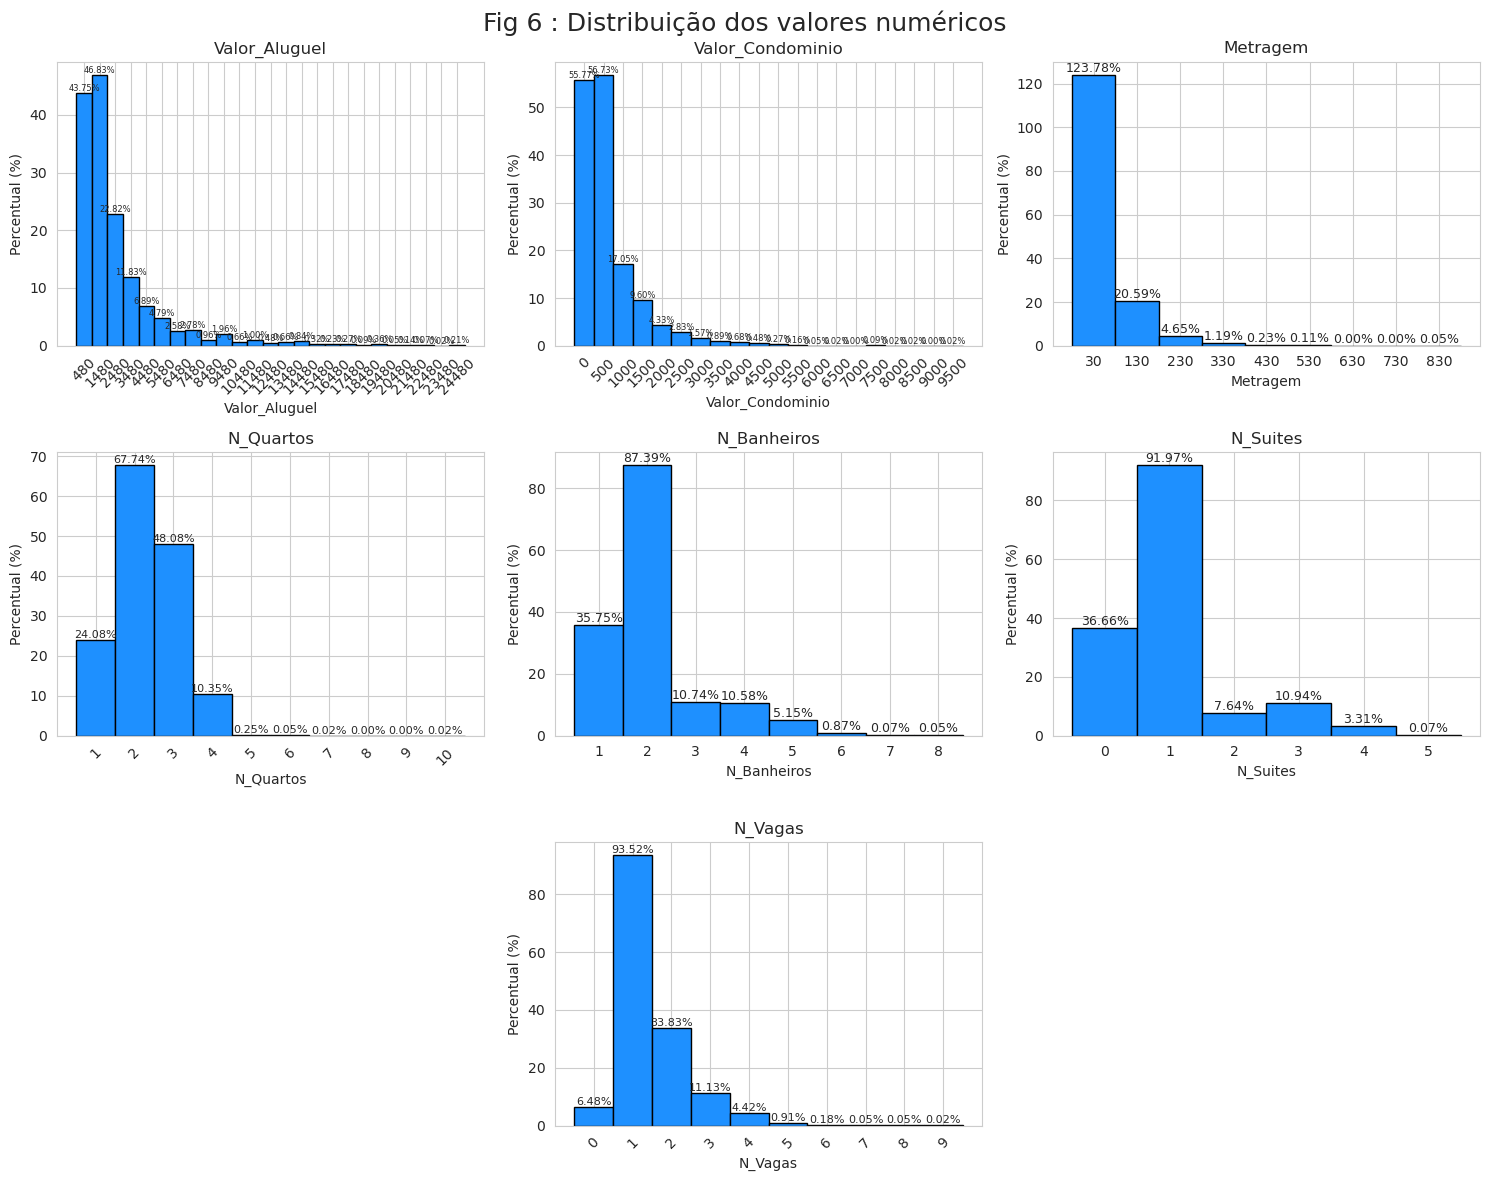

In [23]:
# Histogramas do  conjunto de dados (semfiltragem)
fig, ax = plt.subplots(3, 3, figsize=(15, 12)) 
fig.suptitle('Fig 6 : Distribuição dos valores numéricos', fontsize=18)


c1,x1,p1,bins1=hist_p(df,'Valor_Aluguel',1000)
c2,x2,p2,bins2=hist_p(df,'Valor_Condominio',500)
c3,x3,p3,bins3=hist_p(df,'Metragem',100)

c4,x4,p4,bins4=hist_p(df,'N_Quartos',1)
c5,x5,p5,bins5=hist_p(df,'N_Banheiros',1)
c6,x6,p6,bins6=hist_p(df,'N_Suites',1)
c7,x7,p7,bins7=hist_p(df,'N_Vagas',1)

mult_bar(0,0,c1,x1,p1,bins1,'Valor_Aluguel')
mult_bar(0,1,c2,x2,p2,bins2,'Valor_Condominio')
mult_bar(0,2,c3,x3,p3,bins3,'Metragem')
mult_bar(1,0,c4,x4,p4,bins4,'N_Quartos')
mult_bar(1,1,c5,x5,p5,bins5,'N_Banheiros')
mult_bar(1,2,c6,x6,p6,bins6,'N_Suites')
mult_bar(2,1,c7,x7,p7,bins7,'N_Vagas')

ax[2][0].set_visible(False)
ax[2][2].set_visible(False)
plt.tight_layout()
plt.show()

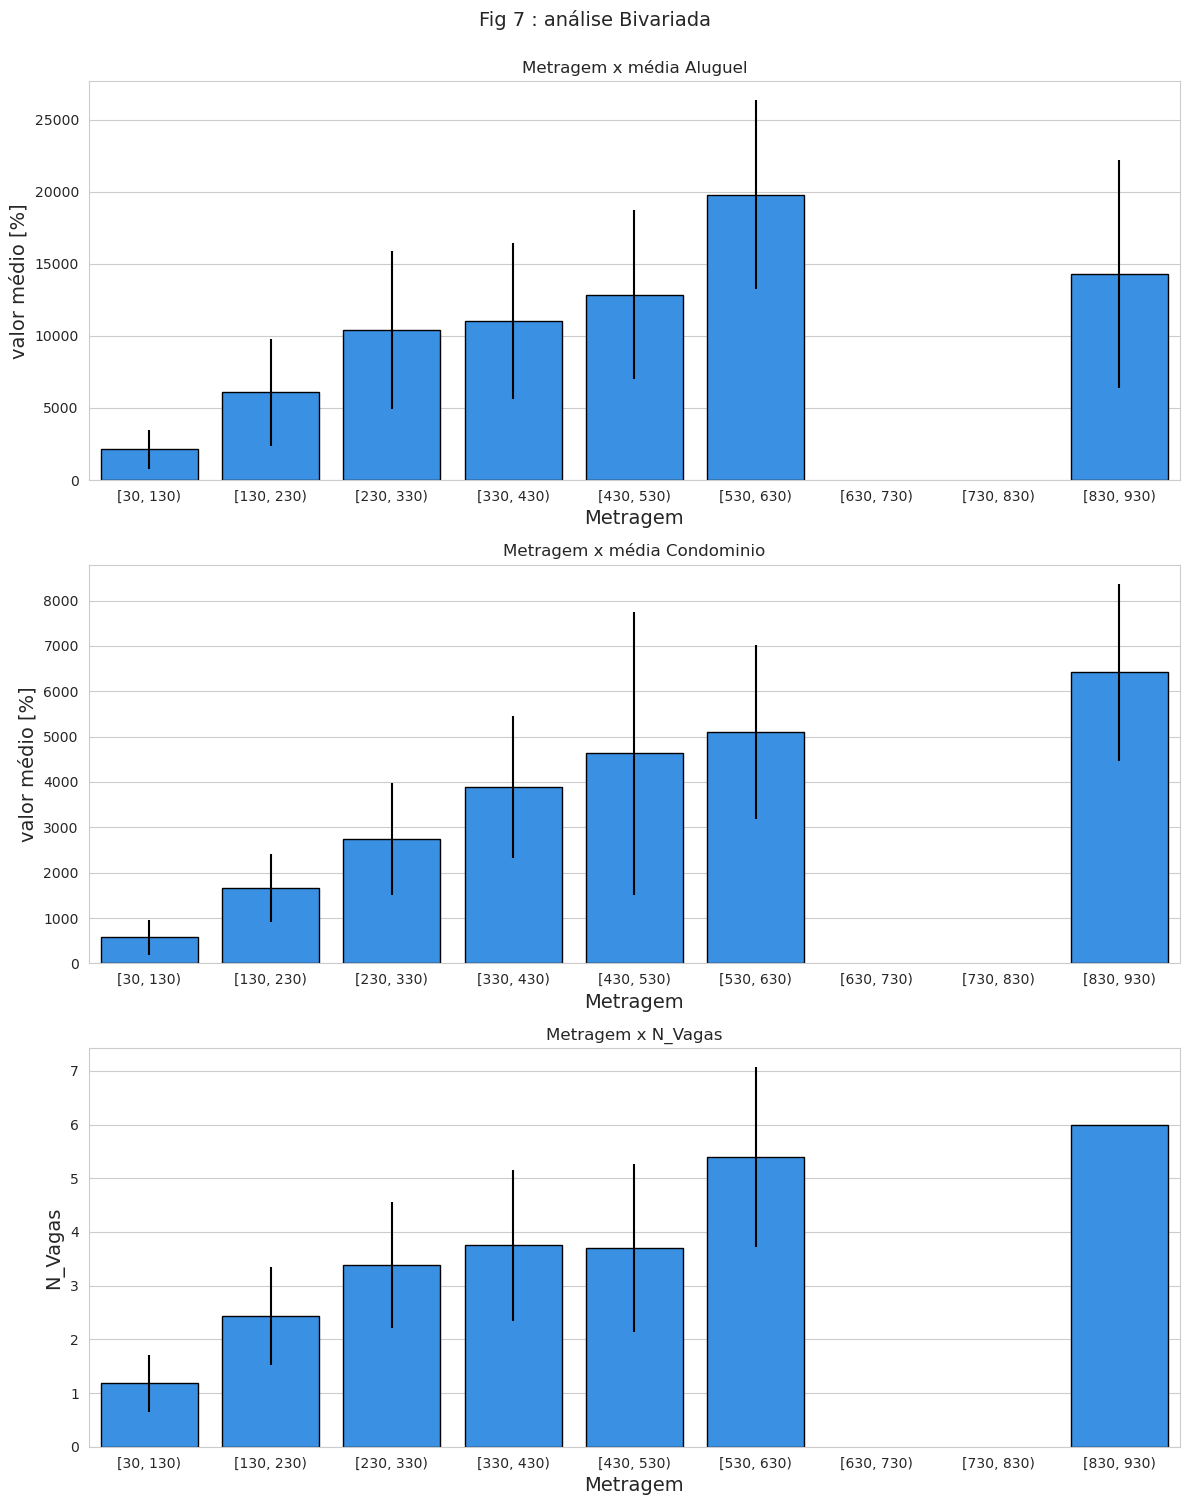

In [24]:
#Análise Bivariada
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Fig 7 : análise Bivariada', fontsize=14,y=1);
sns.set_style("whitegrid") 

df['Metragem_inter'] = pd.cut(df['Metragem'], bins=bins3, right=False)
# plot 1: Metragem x média Aluguel

df_grp1 = df.groupby('Metragem_inter')['Valor_Aluguel'].agg(['mean', 'std']).reset_index()
df_grp1.columns = ['Metragem_inter', 'Mean', 'Std']  # Renomear colunas

sns.barplot(x='Metragem_inter', y='Mean', data=df_grp1, yerr=df_grp1['Std'],
              color='dodgerblue',edgecolor='black',ax=ax[0])
ax[0].set_title('Metragem x média Aluguel')
ax[0].set_xlabel('Metragem', fontsize=14)
ax[0].set_ylabel('valor médio [%]', fontsize=14)

# plot 2: Metragem x condominio
df_grp2 = df.groupby('Metragem_inter')['Valor_Condominio'].agg(['mean', 'std']).reset_index()
df_grp2.columns = ['Metragem_inter', 'Mean', 'Std']  # Renomear colunas

sns.barplot(x='Metragem_inter', y='Mean', data=df_grp2, yerr=df_grp2['Std'],
              color='dodgerblue',edgecolor='black',ax=ax[1])
ax[1].set_title('Metragem x média Condominio')
ax[1].set_xlabel('Metragem', fontsize=14)
ax[1].set_ylabel('valor médio [%]', fontsize=14)


# plot 3: Metragem x Numero de Vagas
df['Metragem_inter'] = pd.cut(df['Metragem'], bins=bins3, right=False)

df_grp3 = df.groupby('Metragem_inter')['N_Vagas'].agg(['mean', 'std']).reset_index()
df_grp3.columns = ['Metragem_inter', 'Mean', 'Std']  # Renomear colunas



sns.barplot(x='Metragem_inter', y='Mean', data=df_grp3, yerr=df_grp3['Std'],
             color='dodgerblue',edgecolor='black',ax=ax[2])
ax[2].set_title('Metragem x N_Vagas')
ax[2].set_xlabel('Metragem', fontsize=14)
ax[2].set_ylabel('N_Vagas', fontsize=14)

plt.tight_layout() 

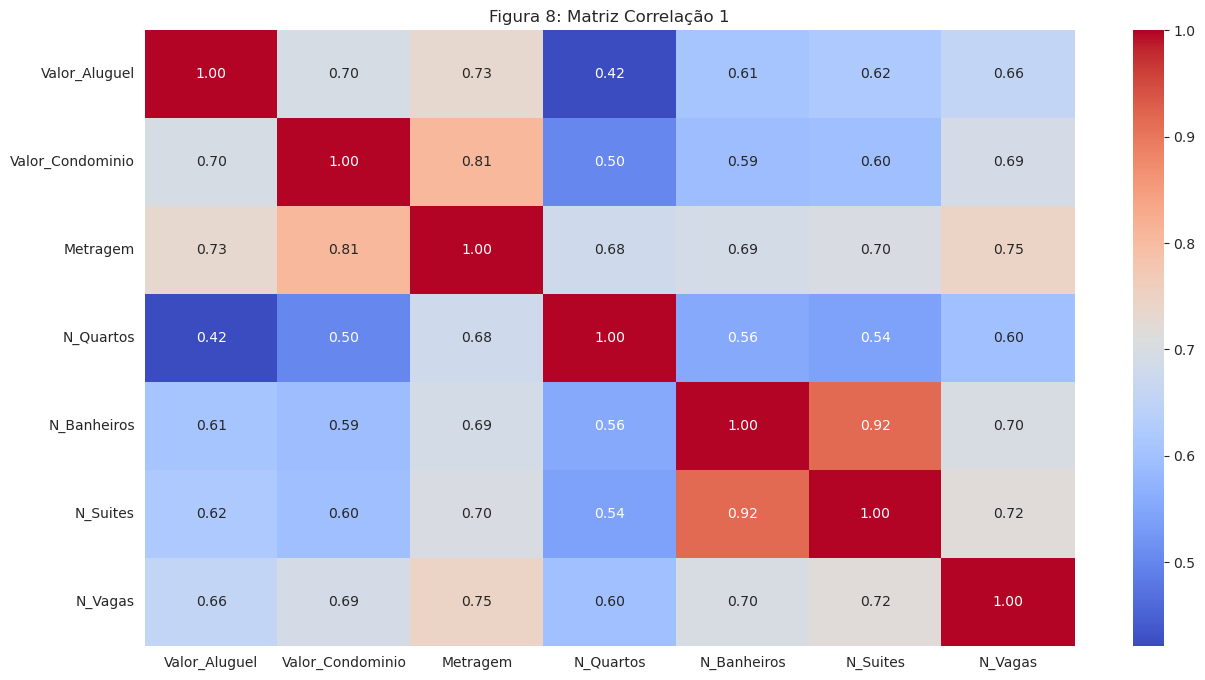

In [25]:
#Matriz de correlação
df_corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr,
           annot=True,
           cmap='coolwarm',
           fmt='.2f',
           annot_kws={'size': 10})
plt.title('Figura 8: Matriz Correlação 1')
plt.show()

Tamanho de x: (6605, 7)


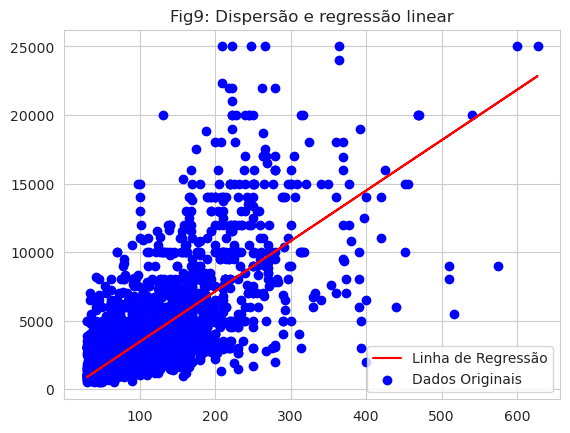

In [26]:
#base de treino, teste, modelagem
x = df.drop(['Valor_Aluguel'], axis=1) #todas menos o target
y = df['Valor_Aluguel'] # previsão Valor Aluguel
print(f"Tamanho de x: {x.shape}")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
# Separar a variável independente da variável dependente
x = x_train[['Metragem']].values.reshape(-1, 1)
y = y_train.values

#Modelo de regressão
mod_lin = LR()
mod_lin.fit(x,y)
media = np.mean(y)
desvio_padrao = np.std(y)
coef_variacao = (desvio_padrao / media) * 100
#Grafico de dispersão
plt.scatter(x, y, color='blue', label='Dados Originais')
plt.plot(x, mod_lin.predict(x), color='red', label='Linha de Regressão')
plt.title('Fig9: Dispersão e regressão linear')
plt.legend()
plt.show()

In [27]:
# Variaveis de teste
x_test = x_test[['Metragem']].values.reshape(-1, 1)
y_test = y_test
previsoes = mod_lin.predict(x_test)


In [28]:
print("== Resumo processos sem filtragem Outliers ==")

# bases de dados
print("\n= Informações sobre as Bases de Dados ==")
print(f"Base de Treino (features): {x_train.shape}")
print(f"Base de Teste  (features): {x_test.shape}")
print(f"Base de Treino (target):   {y_train.shape}")
print(f"Base de Teste  (target):   {y_test.shape}")

# Métricas de dispersão
print("\n== Métricas de Dispersão ==")
print(f"Desvio Padrão:            {desvio_padrao:.3f}")
print(f"Coeficiente de Variação:  {coef_variacao:.3f} %")

# Equação da reta
print("\n== Equação da Reta ==")
print(f"Y = aX + b")
print(f"a (coeficiente angular) = {mod_lin.coef_[0]:.3f}")
print(f"b (intercepto)          = {mod_lin.intercept_:.3f}")
print(f"Equação: Y = {mod_lin.coef_[0]:.3f}X + {mod_lin.intercept_:.3f}")

# Métricas de desempenho
print("\n== Métricas de Desempenho ==")
print(f"Coeficiente de Determinação (R²) nos Dados de Treino: {mod_lin.score(x, y):.3f}")
print(f"Coeficiente de Determinação (R²) nos Dados de Teste:  {mod_lin.score(x_test, y_test):.3f}")

== Resumo processos sem filtragem Outliers ==

= Informações sobre as Bases de Dados ==
Base de Treino (features): (4953, 7)
Base de Teste  (features): (1652, 1)
Base de Treino (target):   (4953,)
Base de Teste  (target):   (1652,)

== Métricas de Dispersão ==
Desvio Padrão:            3056.998
Coeficiente de Variação:  100.101 %

== Equação da Reta ==
Y = aX + b
a (coeficiente angular) = 36.813
b (intercepto)          = -243.555
Equação: Y = 36.813X + -243.555

== Métricas de Desempenho ==
Coeficiente de Determinação (R²) nos Dados de Treino: 0.551
Coeficiente de Determinação (R²) nos Dados de Teste:  0.485


## Caso 2 - Procedimentos filtragem alternativa
Remoção pontual em cada categoria

In [29]:
df3=df[df['Metragem']<500]
#df3=df3[df3['Valor_Condominio']<7000]
df3=df3[df3['N_Vagas']<7]
df3=df3[df3['N_Banheiros']<7]
print(f'Redução: {(len(df3) / len(df) - 1) * 100:.2f}%')


Redução: -0.29%


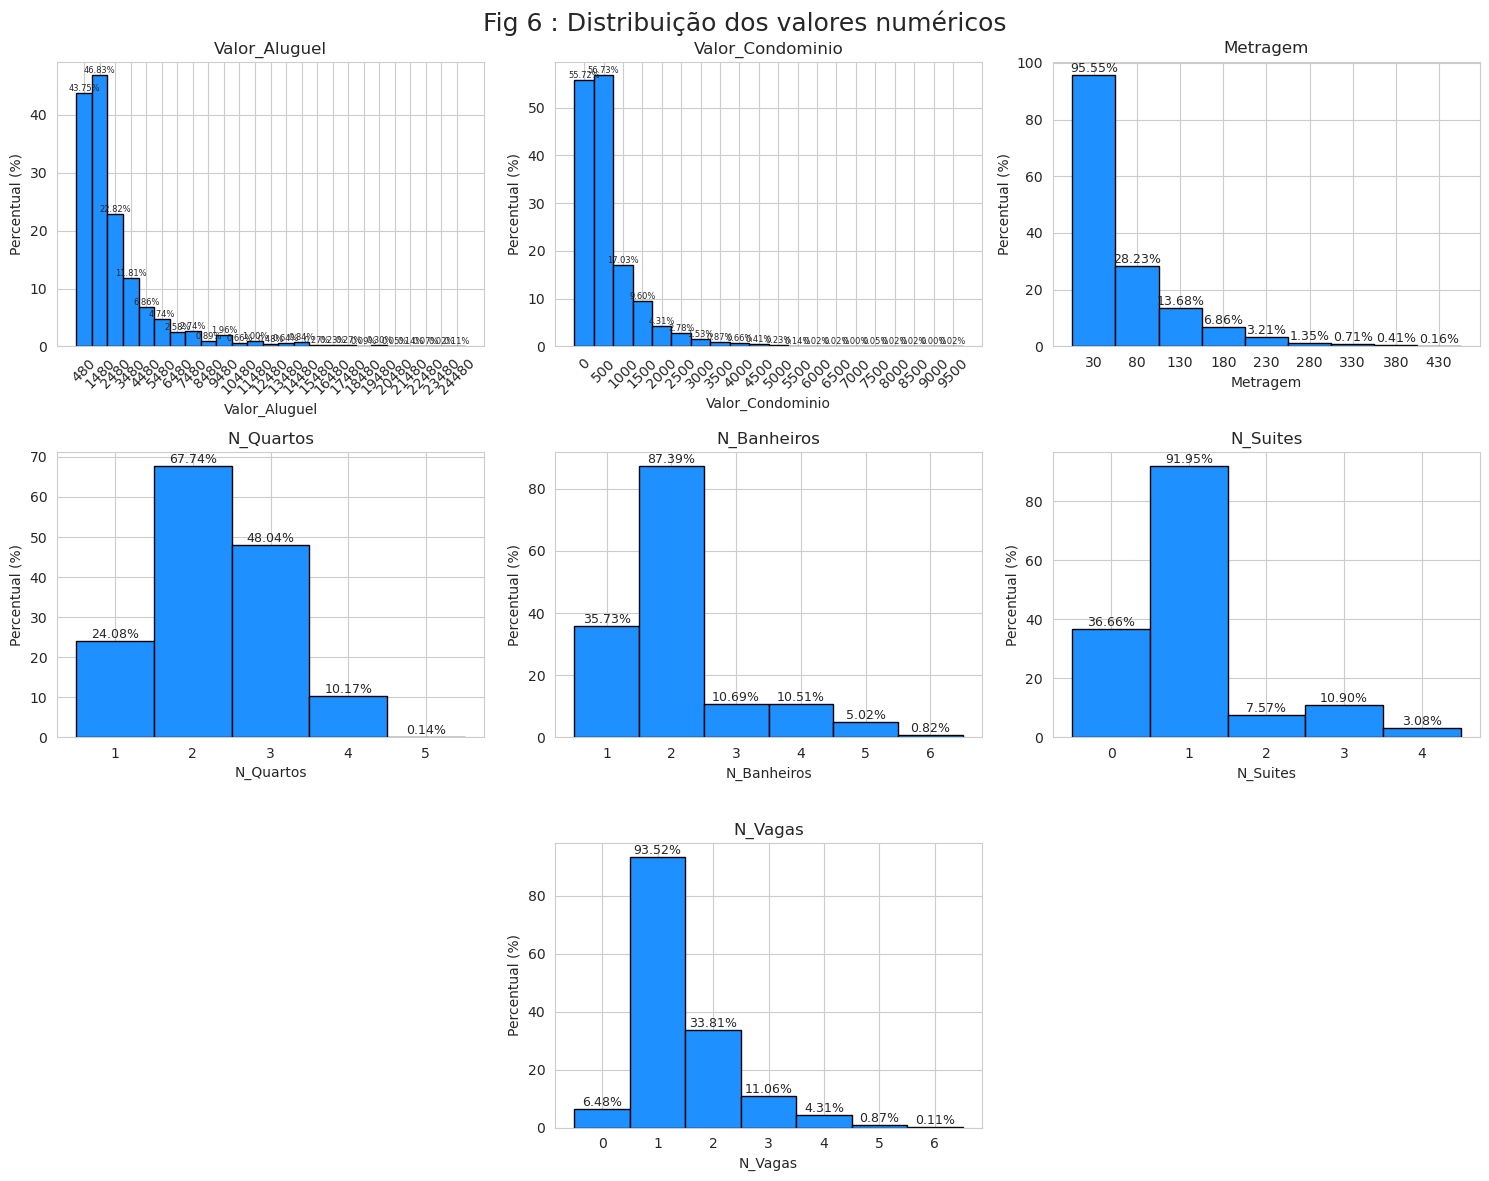

In [30]:
# Histogramas do  conjunto de dados (semfiltragem)
fig, ax = plt.subplots(3, 3, figsize=(15, 12)) 
fig.suptitle('Fig 6 : Distribuição dos valores numéricos', fontsize=18)

c1,x1,p1,bins1=hist_p(df3,'Valor_Aluguel',1000)
c2,x2,p2,bins2=hist_p(df3,'Valor_Condominio',500)
c3,x3,p3,bins3=hist_p(df3,'Metragem',50)

c4,x4,p4,bins4=hist_p(df3,'N_Quartos',1)
c5,x5,p5,bins5=hist_p(df3,'N_Banheiros',1)
c6,x6,p6,bins6=hist_p(df3,'N_Suites',1)
c7,x7,p7,bins7=hist_p(df3,'N_Vagas',1)

mult_bar(0,0,c1,x1,p1,bins1,'Valor_Aluguel')
mult_bar(0,1,c2,x2,p2,bins2,'Valor_Condominio')
mult_bar(0,2,c3,x3,p3,bins3,'Metragem')
mult_bar(1,0,c4,x4,p4,bins4,'N_Quartos')
mult_bar(1,1,c5,x5,p5,bins5,'N_Banheiros')
mult_bar(1,2,c6,x6,p6,bins6,'N_Suites')
mult_bar(2,1,c7,x7,p7,bins7,'N_Vagas')

ax[2][0].set_visible(False)
ax[2][2].set_visible(False)
plt.tight_layout()
plt.show()

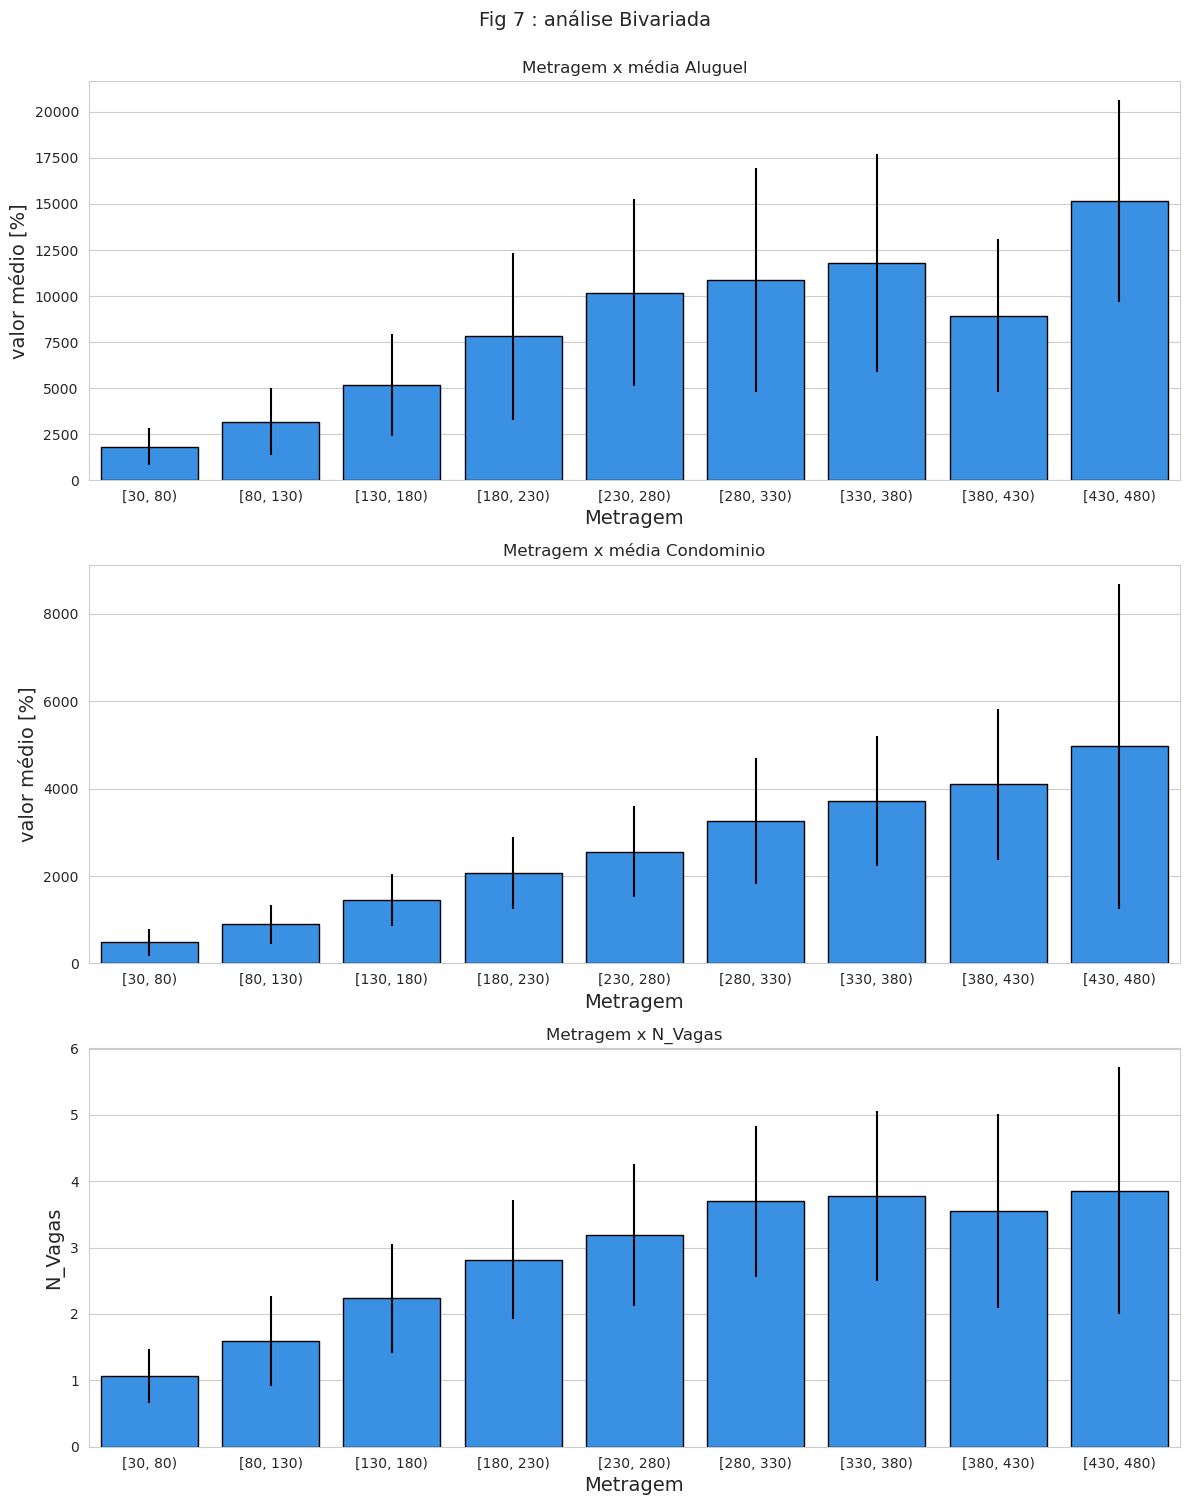

In [31]:
#Análise Bivariada
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Fig 7 : análise Bivariada', fontsize=14,y=1);
sns.set_style("whitegrid") 

df3['Metragem_inter'] = pd.cut(df3['Metragem'], bins=bins3, right=False)
# plot 1: Metragem x média Aluguel

df_grp1 = df3.groupby('Metragem_inter')['Valor_Aluguel'].agg(['mean', 'std']).reset_index()
df_grp1.columns = ['Metragem_inter', 'Mean', 'Std']  # Renomear colunas

sns.barplot(x='Metragem_inter', y='Mean', data=df_grp1, yerr=df_grp1['Std'],
              color='dodgerblue',edgecolor='black',ax=ax[0])
ax[0].set_title('Metragem x média Aluguel')
ax[0].set_xlabel('Metragem', fontsize=14)
ax[0].set_ylabel('valor médio [%]', fontsize=14)

# plot 2: Metragem x condominio
df_grp2 = df3.groupby('Metragem_inter')['Valor_Condominio'].agg(['mean', 'std']).reset_index()
df_grp2.columns = ['Metragem_inter', 'Mean', 'Std']  # Renomear colunas

sns.barplot(x='Metragem_inter', y='Mean', data=df_grp2, yerr=df_grp2['Std'],
              color='dodgerblue',edgecolor='black',ax=ax[1])
ax[1].set_title('Metragem x média Condominio')
ax[1].set_xlabel('Metragem', fontsize=14)
ax[1].set_ylabel('valor médio [%]', fontsize=14)


# plot 3: Metragem x Numero de Vagas
df3['Metragem_inter'] = pd.cut(df3['Metragem'], bins=bins3, right=False)

df_grp3 = df3.groupby('Metragem_inter')['N_Vagas'].agg(['mean', 'std']).reset_index()
df_grp3.columns = ['Metragem_inter', 'Mean', 'Std']  # Renomear colunas



sns.barplot(x='Metragem_inter', y='Mean', data=df_grp3, yerr=df_grp3['Std'],
             color='dodgerblue',edgecolor='black',ax=ax[2])
ax[2].set_title('Metragem x N_Vagas')
ax[2].set_xlabel('Metragem', fontsize=14)
ax[2].set_ylabel('N_Vagas', fontsize=14)

plt.tight_layout() 

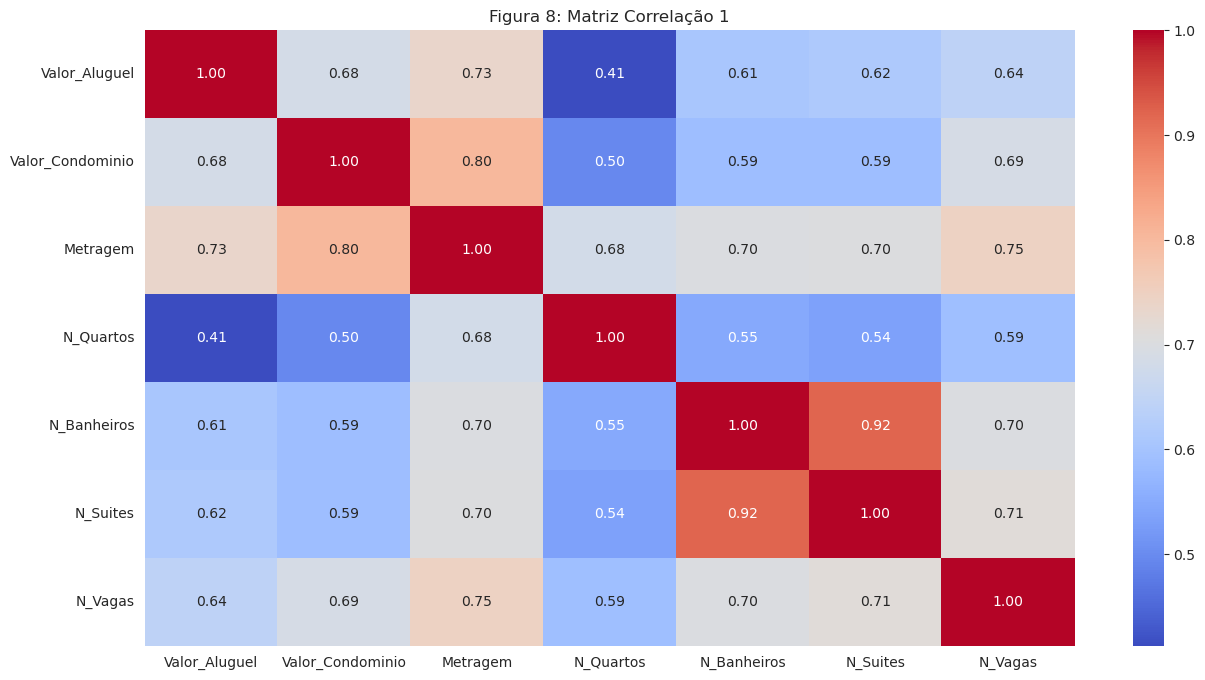

In [32]:
#Matriz de correlação
df_corr = df3.select_dtypes(include=['number']).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr,
           annot=True,
           cmap='coolwarm',
           fmt='.2f',
           annot_kws={'size': 10})
plt.title('Figura 8: Matriz Correlação 1')
plt.show()

Tamanho de x: (6586, 7)


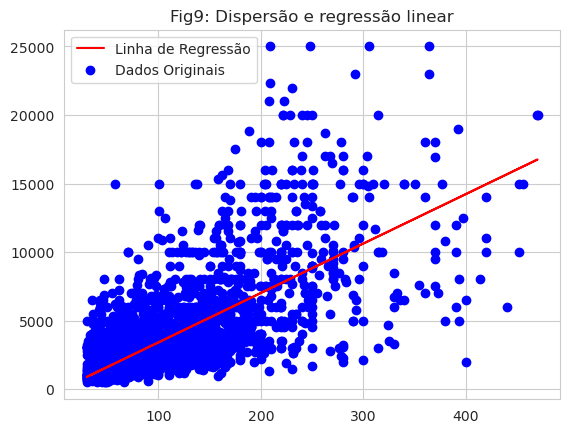

In [33]:
#base de treino, teste, modelagem
x = df3.drop(['Valor_Aluguel'], axis=1) #todas menos o target
y = df3['Valor_Aluguel'] # previsão Valor Aluguel
print(f"Tamanho de x: {x.shape}")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
# Separar a variável independente da variável dependente
x = x_train[['Metragem']].values.reshape(-1, 1)
y = y_train.values

#Modelo de regressão
mod_lin = LR()
mod_lin.fit(x,y)
media = np.mean(y)
desvio_padrao = np.std(y)
coef_variacao = (desvio_padrao / media) * 100
#Grafico de dispersão
plt.scatter(x, y, color='blue', label='Dados Originais')
plt.plot(x, mod_lin.predict(x), color='red', label='Linha de Regressão')
plt.title('Fig9: Dispersão e regressão linear')
plt.legend()
plt.show()

# Variaveis de teste
x_test = x_test[['Metragem']].values.reshape(-1, 1)
y_test = y_test
previsoes = mod_lin.predict(x_test)


In [34]:
print("== Resumo processos filtram pontual ==")

# bases de dados
print("\n= Informações sobre as Bases de Dados ==")
print(f"Base de Treino (features): {x_train.shape}")
print(f"Base de Teste  (features): {x_test.shape}")
print(f"Base de Treino (target):   {y_train.shape}")
print(f"Base de Teste  (target):   {y_test.shape}")

# Métricas de dispersão
print("\n== Métricas de Dispersão ==")
print(f"Desvio Padrão:            {desvio_padrao:.3f}")
print(f"Coeficiente de Variação:  {coef_variacao:.3f} %")

# Equação da reta
print("\n== Equação da Reta ==")
print(f"Y = aX + b")
print(f"a (coeficiente angular) = {mod_lin.coef_[0]:.3f}")
print(f"b (intercepto)          = {mod_lin.intercept_:.3f}")
print(f"Equação: Y = {mod_lin.coef_[0]:.3f}X + {mod_lin.intercept_:.3f}")

# Métricas de desempenho
print("\n== Métricas de Desempenho ==")
print(f"Coeficiente de Determinação (R²) nos Dados de Treino: {mod_lin.score(x, y):.3f}")
print(f"Coeficiente de Determinação (R²) nos Dados de Teste:  {mod_lin.score(x_test, y_test):.3f}")

== Resumo processos filtram pontual ==

= Informações sobre as Bases de Dados ==
Base de Treino (features): (4939, 7)
Base de Teste  (features): (1647, 1)
Base de Treino (target):   (4939,)
Base de Teste  (target):   (1647,)

== Métricas de Dispersão ==
Desvio Padrão:            2925.253
Coeficiente de Variação:  97.492 %

== Equação da Reta ==
Y = aX + b
a (coeficiente angular) = 36.072
b (intercepto)          = -202.264
Equação: Y = 36.072X + -202.264

== Métricas de Desempenho ==
Coeficiente de Determinação (R²) nos Dados de Treino: 0.536
Coeficiente de Determinação (R²) nos Dados de Teste:  0.550
